In [1]:
import or_gym
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from copy import deepcopy
plt.style.use('cmu_paper')

In [2]:
def load_model_results(model='RL', base_path='../scenarios', version=2):
    data_dict = {}
    data_dirs = os.listdir(base_path)
    for d in data_dirs:
        # Load RL data
        if model in d and str(version) in d:
            file_count = 0
            _path = os.path.join(base_path, d)
            files = os.listdir(_path)
            for f in files:
                if 'pkl' not in f.split('.')[-1]:
                    continue
                path = os.path.join(_path, f)
                data = pickle.load(open(path, 'rb'))
                data_dict[file_count] = deepcopy(data)
                file_count += 1
                
    return data_dict

In [36]:
rl_v2 = load_model_results()
rl_v3 = load_model_results(version=3)
rh_v2 = load_model_results('RH')
rh_v3 = load_model_results('RH', version=3)
sh_v2 = load_model_results('SH')
sh_v3 = load_model_results('SH', version=3)
sp_rh_v2 = load_model_results('MSSP_RH')
sp_rh_v3 = load_model_results('MSSP_RH', version=3)
sp_sh_v2 = load_model_results('MSSP_SH')
sp_sh_v3 = load_model_results('MSSP_SH', version=3)
or_v2 = load_model_results('Oracle')
or_v3 = load_model_results('Oracle', version=3)

# RL Rewards were saved differently
rl_v2_ = pickle.load(open('../scenarios/data/rl_v2.pkl', 'rb'))
rl_v3_ = pickle.load(open('../scenarios/data/rl_v3.pkl', 'rb'))
rl_v2_reward = rl_v2_['rewards'].sum(axis=1)
rl_v3_reward = rl_v3_['rewards'].sum(axis=1)

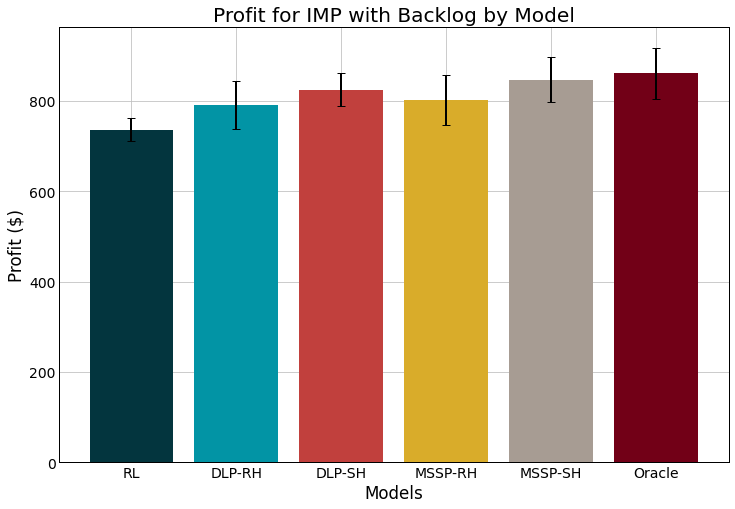

In [332]:
# Plot reward averages and std
sh_v2_reward = np.array([i.P.values.sum() for i in sh_v2.values()])
rh_v2_reward = np.array([i.P.values.sum() for i in rh_v2.values()])
sp_rh_v2_reward = np.array([i.P.values.sum() for i in sp_rh_v2.values()])
sp_sh_v2_reward = np.array([i.P.values.sum() for i in sp_sh_v2.values()])
oracle_v2_reward = np.array([i.P.values.sum() for i in or_v2.values()])

plt.figure(figsize=(12,8))
plt.bar(0, rl_v2_reward.mean(), yerr=rl_v2_reward.std(), capsize=4)
plt.bar(1, rh_v2_reward.mean(), yerr=rh_v2_reward.std(), capsize=4)
plt.bar(2, sh_v2_reward.mean(), yerr=sh_v2_reward.std(), capsize=4)
plt.bar(3, sp_rh_v2_reward.mean(), yerr=sp_rh_v2_reward.std(), capsize=4)
plt.bar(4, sp_sh_v2_reward.mean(), yerr=sp_sh_v2_reward.std(), capsize=4)
plt.bar(5, oracle_v2_reward.mean(), yerr=oracle_v2_reward.std(), capsize=4)

plt.xticks(np.arange(6), ['RL', 'DLP-RH', 'DLP-SH', 'MSSP-RH', 'MSSP-SH', 'Oracle'])

plt.xlabel('Models')
plt.ylabel('Profit ($)')
plt.title('Profit for IMP with Backlog by Model')

plt.show()

In [44]:
def build_data_table(RH, SH, RL, SPRH, SPSH, Oracle):
    df = pd.DataFrame({'Rolling Horizon':
                           {'A': RH.mean(),
                            'B': RH.std()},
                        'Shrinking Horizon':
                           {'A': SH.mean(),
                            'B': SH.std()},
                        'SP Rolling Horizon':
                           {'A': SPRH.mean(),
                            'B': SPRH.std()},
                        'SP Shrinking Horizon':
                           {'A': SPSH.mean(),
                            'B': SPSH.std()},
                        'RL':
                           {'A': RL.mean(),
                            'B': RL.std()},
                        'Oracle':
                           {'A': Oracle.mean(),
                            'B': Oracle.std()}})

    df = df.apply(lambda x: np.round(x, 1))
    df['Metric'] = ['Mean Rewards', 'Std Rewards']
    df = df.set_index(df['Metric']).drop('Metric', axis=1)
    return df

In [46]:
df2 = build_data_table(rh_v2_reward, sh_v2_reward, rl_v2_reward, sp_rh_v2_reward, sp_sh_v2_reward, oracle_v2_reward)
df2

,Rolling Horizon,Shrinking Horizon,SP Rolling Horizon,SP Shrinking Horizon,RL,Oracle
Metric,,,,,,
Mean Rewards,791.6,825.3,802.7,847.7,737.2,861.3
Std Rewards,52.3,36.8,56.3,49.4,24.8,56.2


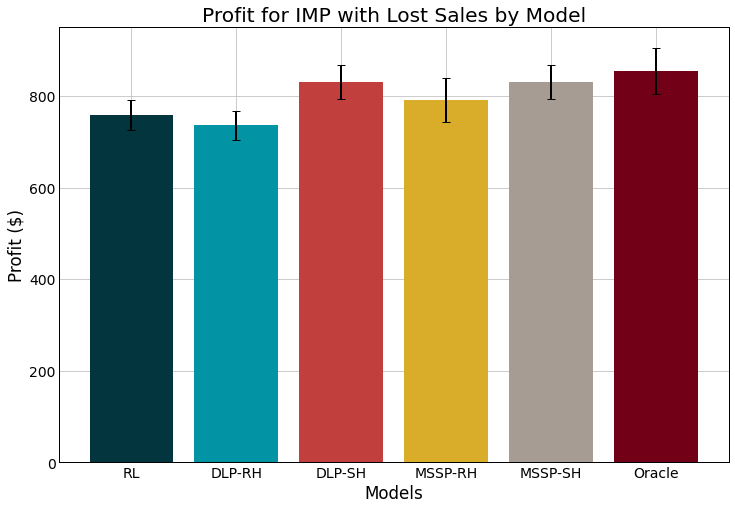

In [333]:
# Plot reward averages and std
sh_v3_reward = np.array([i.P.values.sum() for i in sh_v3.values()])
rh_v3_reward = np.array([i.P.values.sum() for i in rh_v3.values()])
sp_rh_v3_reward = np.array([i.P.values.sum() for i in sp_rh_v3.values()])
sp_sh_v3_reward = np.array([i.P.values.sum() for i in sp_sh_v3.values()])
oracle_v3_reward = np.array([i.P.values.sum() for i in or_v3.values()])
# rl_v3_reward = np.array([i.P.values.sum() for i in rl_v3.values()])

plt.figure(figsize=(12,8))
plt.bar(0, rl_v3_reward.mean(), yerr=rl_v3_reward.std(), capsize=4)
plt.bar(1, rh_v3_reward.mean(), yerr=rh_v3_reward.std(), capsize=4)
plt.bar(2, sh_v3_reward.mean(), yerr=sh_v3_reward.std(), capsize=4)
plt.bar(3, sp_rh_v3_reward.mean(), yerr=sp_rh_v3_reward.std(), capsize=4)
plt.bar(4, sp_sh_v3_reward.mean(), yerr=sp_sh_v3_reward.std(), capsize=4)
plt.bar(5, oracle_v3_reward.mean(), yerr=oracle_v3_reward.std(), capsize=4)

plt.xticks(np.arange(6), ['RL', 'DLP-RH', 'DLP-SH', 'MSSP-RH', 'MSSP-SH', 'Oracle'])

plt.xlabel('Models')
plt.ylabel('Profit ($)')
plt.title('Profit for IMP with Lost Sales by Model')

plt.show()

In [47]:
df3 = build_data_table(rh_v3_reward, sh_v3_reward, rl_v3_reward, sp_rh_v3_reward, sp_sh_v3_reward, oracle_v3_reward)
df3

,Rolling Horizon,Shrinking Horizon,SP Rolling Horizon,SP Shrinking Horizon,RL,Oracle
Metric,,,,,,
Mean Rewards,735.8,830.6,790.6,830.6,757.8,854.9
Std Rewards,31.1,37.7,47.8,37.7,33.1,49.6


In [52]:
# Inventory Levels
env = rh_v2[0]
env.state

array([  0.,   1.,   0., 755.,   0.,   0.,   0.,  78.,  78.,  58.,  38.,
        28.,   0.,  10.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,  90.,  90.,  90.,  90.,  90.,  90.,  90.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.])

In [64]:
env.adjacency_matrix

array([[1, 0],
       [2, 1],
       [3, 1],
       [4, 2],
       [4, 3],
       [5, 2],
       [6, 2],
       [6, 3],
       [7, 4],
       [7, 5],
       [8, 5],
       [8, 6]], dtype=int32)

In [167]:
def sum_echelon_inventory(models):
    inv = {}
    for i, (k, v) in enumerate(models.items()):
        env = models[k]
        for n in env.X.columns:
            if i == 0:
                inv[n] = np.zeros((len(models), 31))
            inv[n][i] += env.X[n].values
            for p in env.Y.columns:
                if n == p[1]:
                    inv[n][i] += env.Y[p].values
    return inv

In [98]:
rh2_inv = sum_echelon_inventory(rh_v2)

In [103]:
rh2_inv = {}
for i, (k, v) in enumerate(rh_v2.items()):
    for n in env.X.columns:
        if i == 0:
            rh2_inv[n] = np.zeros((len(rh_v2), env.period + 1))
        rh2_inv[n][i] += env.X[n].values
        for p in env.Y.columns:
            if n == p[1]:
                rh2_inv[n][i] += env.Y[p].values

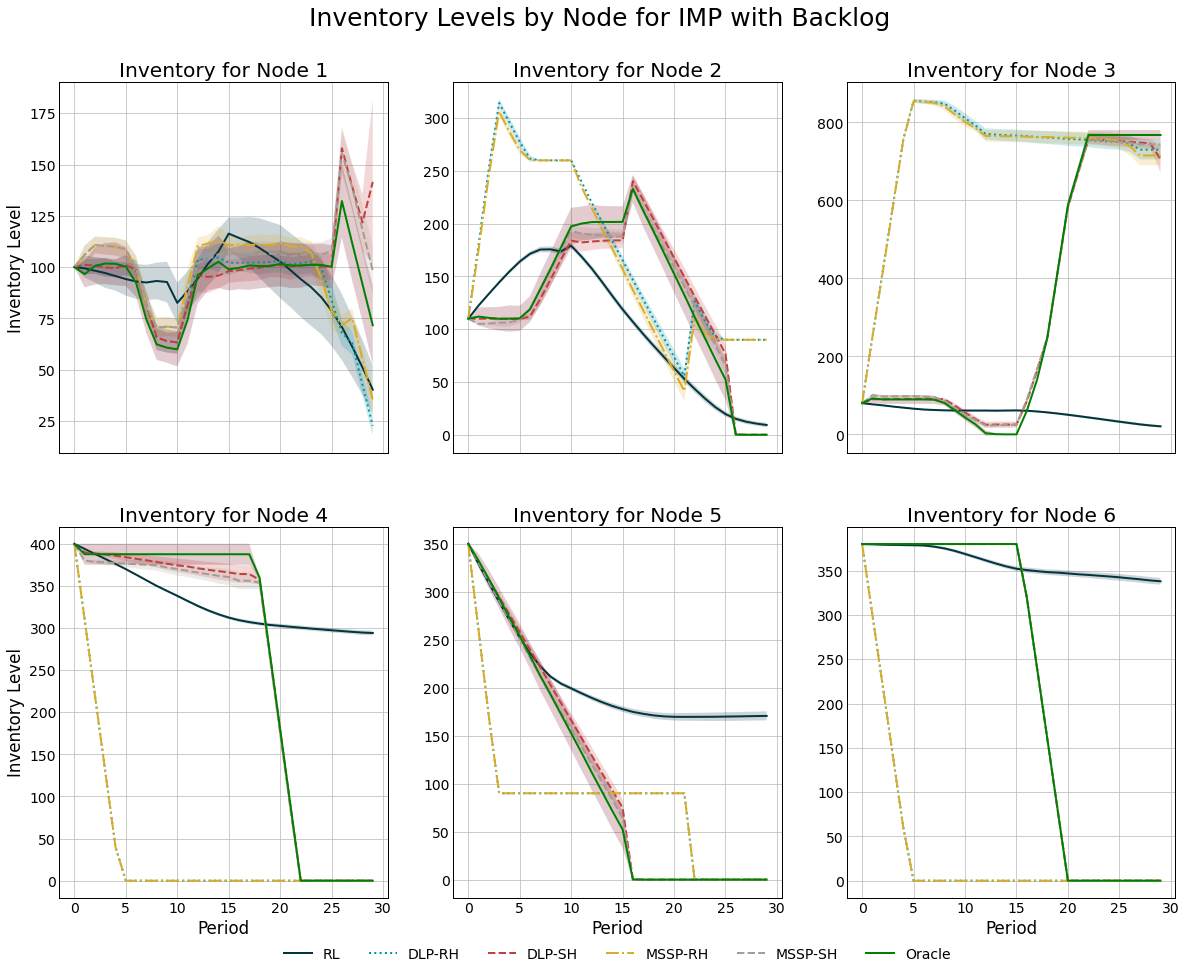

In [251]:
rl2_inv = sum_echelon_inventory(rl_v2)
rh2_inv = sum_echelon_inventory(rh_v2)
sh2_inv = sum_echelon_inventory(sh_v2)
sp_rh2_inv = sum_echelon_inventory(sp_rh_v2)
sp_sh2_inv = sum_echelon_inventory(sp_sh_v2)
or2_inv = sum_echelon_inventory(or_v2)

linestyles = ['solid', 'dotted', 'dashed', 'dashdot', 'dashed', 'solid']

fig, ax = plt.subplots(2, 3, figsize=(20, 15), sharex=True)

for i, (k, v) in enumerate(rl2_inv.items()):
    row = 0 if i <= 2 else 1
    col = i % 3
    
    m = v.mean(axis=0)[:30]
    s = v.std(axis=0)[:30]
    ax[row, col].plot(m, label='RL', linestyle=linestyles[0])
    ax[row, col].fill_between(np.arange(len(m)), m+s, m-s, alpha=0.2)
    ax[row, col].set_title('Inventory for Node {}'.format(k))
#     ax[row, col].set_ylabel('Inventory Level')
#     ax[row, col].set_xlabel('Period')
    
for i, (k, v) in enumerate(rh2_inv.items()):
    row = 0 if i <= 2 else 1
    col = i % 3
    
    m = v.mean(axis=0)[:30]
    s = v.std(axis=0)[:30]
    ax[row, col].plot(m, label='DLP-RH', linestyle=linestyles[1])
    ax[row, col].fill_between(np.arange(len(m)), m+s, m-s, alpha=0.2)
    
for i, (k, v) in enumerate(sh2_inv.items()):
    row = 0 if i <= 2 else 1
    col = i % 3
    
    m = v.mean(axis=0)[:30]
    s = v.std(axis=0)[:30]
    ax[row, col].plot(m, label='DLP-SH', linestyle=linestyles[2])
    ax[row, col].fill_between(np.arange(len(m)), m+s, m-s, alpha=0.2)
    
for i, (k, v) in enumerate(sp_rh2_inv.items()):
    row = 0 if i <= 2 else 1
    col = i % 3
    
    m = v.mean(axis=0)[:30]
    s = v.std(axis=0)[:30]
    ax[row, col].plot(m, label='MSSP-RH', linestyle=linestyles[3])
    ax[row, col].fill_between(np.arange(len(m)), m+s, m-s, alpha=0.2)
    
for i, (k, v) in enumerate(sp_sh2_inv.items()):
    row = 0 if i <= 2 else 1
    col = i % 3
    
    m = v.mean(axis=0)[:30]
    s = v.std(axis=0)[:30]
    ax[row, col].plot(m, label='MSSP-SH', linestyle=linestyles[4])
    ax[row, col].fill_between(np.arange(len(m)), m+s, m-s, alpha=0.2)
    
for i, (k, v) in enumerate(or2_inv.items()):
    row = 0 if i <= 2 else 1
    col = i % 3
    
    m = v.mean(axis=0)[:30]
    s = v.std(axis=0)[:30]
    ax[row, col].plot(m, label='Oracle', linestyle=linestyles[5], c='g')
    ax[row, col].fill_between(np.arange(len(m)), m+s, m-s, alpha=0.2)
    
ax[1, 1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
    fancybox=False, shadow=False, ncol=6)

ax[0, 0].set_ylabel('Inventory Level')
ax[1, 0].set_ylabel('Inventory Level')
ax[1, 0].set_xlabel('Period')
ax[1, 1].set_xlabel('Period')
ax[1, 2].set_xlabel('Period')

plt.suptitle('Inventory Levels by Node for IMP with Backlog', y=0.95, size=25)

# plt.tight_layout()
plt.show()

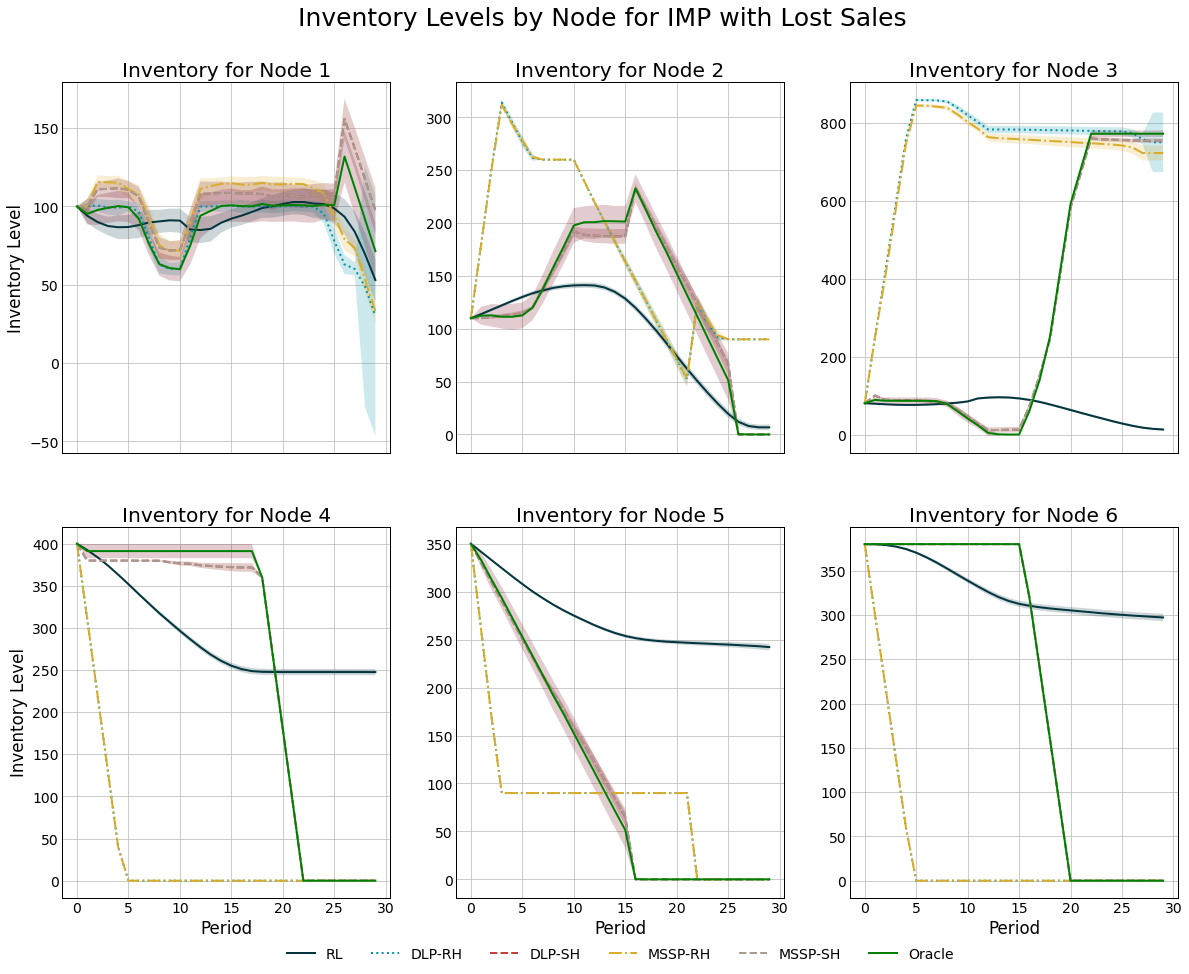

In [252]:
rl3_inv = sum_echelon_inventory(rl_v3)
rh3_inv = sum_echelon_inventory(rh_v3)
sh3_inv = sum_echelon_inventory(sh_v3)
sp_rh3_inv = sum_echelon_inventory(sp_rh_v3)
sp_sh3_inv = sum_echelon_inventory(sp_sh_v3)
or3_inv = sum_echelon_inventory(or_v3)

linestyles = ['solid', 'dotted', 'dashed', 'dashdot', 'dashed', 'solid']

fig, ax = plt.subplots(2, 3, figsize=(20, 15), sharex=True)

for i, (k, v) in enumerate(rl3_inv.items()):
    row = 0 if i <= 2 else 1
    col = i % 3
    
    m = v.mean(axis=0)[:30]
    s = v.std(axis=0)[:30]
    ax[row, col].plot(m, label='RL', linestyle=linestyles[0])
    ax[row, col].fill_between(np.arange(len(m)), m+s, m-s, alpha=0.2)
    ax[row, col].set_title('Inventory for Node {}'.format(k))
#     ax[row, col].set_ylabel('Inventory Level')
#     ax[row, col].set_xlabel('Period')
    
for i, (k, v) in enumerate(rh3_inv.items()):
    row = 0 if i <= 2 else 1
    col = i % 3
    
    m = v.mean(axis=0)[:30]
    s = v.std(axis=0)[:30]
    ax[row, col].plot(m, label='DLP-RH', linestyle=linestyles[1])
    ax[row, col].fill_between(np.arange(len(m)), m+s, m-s, alpha=0.2)
    
for i, (k, v) in enumerate(sh3_inv.items()):
    row = 0 if i <= 2 else 1
    col = i % 3
    
    m = v.mean(axis=0)[:30]
    s = v.std(axis=0)[:30]
    ax[row, col].plot(m, label='DLP-SH', linestyle=linestyles[2])
    ax[row, col].fill_between(np.arange(len(m)), m+s, m-s, alpha=0.2)
    
for i, (k, v) in enumerate(sp_rh3_inv.items()):
    row = 0 if i <= 2 else 1
    col = i % 3
    
    m = v.mean(axis=0)[:30]
    s = v.std(axis=0)[:30]
    ax[row, col].plot(m, label='MSSP-RH', linestyle=linestyles[3])
    ax[row, col].fill_between(np.arange(len(m)), m+s, m-s, alpha=0.2)
    
for i, (k, v) in enumerate(sp_sh3_inv.items()):
    row = 0 if i <= 2 else 1
    col = i % 3
    
    m = v.mean(axis=0)[:30]
    s = v.std(axis=0)[:30]
    ax[row, col].plot(m, label='MSSP-SH', linestyle=linestyles[4])
    ax[row, col].fill_between(np.arange(len(m)), m+s, m-s, alpha=0.2)
    
for i, (k, v) in enumerate(or3_inv.items()):
    row = 0 if i <= 2 else 1
    col = i % 3
    
    m = v.mean(axis=0)[:30]
    s = v.std(axis=0)[:30]
    ax[row, col].plot(m, label='Oracle', linestyle=linestyles[5], c='g')
    ax[row, col].fill_between(np.arange(len(m)), m+s, m-s, alpha=0.2)
    
ax[1, 1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
    fancybox=False, shadow=False, ncol=6)

ax[0, 0].set_ylabel('Inventory Level')
ax[1, 0].set_ylabel('Inventory Level')
ax[1, 0].set_xlabel('Period')
ax[1, 1].set_xlabel('Period')
ax[1, 2].set_xlabel('Period')

plt.suptitle('Inventory Levels by Node for IMP with Lost Sales', y=0.95, size=25)

# plt.tight_layout()
plt.show()

# RL-v2 Network Traffic

In [248]:
from matplotlib.lines import Line2D

def softmax(X, T=1):
    X = np.array(X) / T
    return np.exp(X - X.max()) / np.sum(np.exp(X - X.max()))

def link_useage(models):
    orders = {}
    for i, (k, v) in enumerate(models.items()):
        env = models[k]
        for n in env.R.columns:
            if i == 0:
                orders[n] = np.zeros(len(models))
            orders[n][i] += env.R[n].values.sum()
    return orders

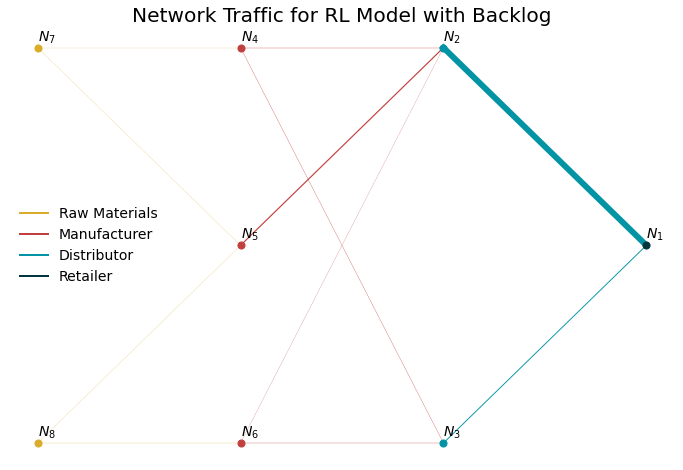

In [341]:
orders = link_useage(rl_v2)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
adjacency_matrix = np.vstack(env.graph.edges())
# Set level colors
level_col = {'retailer': 0,
            'distributor': 1,
            'manufacturer': 2,
            'raw_materials': 3}

max_density = np.max([len(v) for v in env.levels.values()])
node_coords = {}
node_num = 8
plt.figure(figsize=(12,8))
for i, (level, nodes) in enumerate(reversed(env.levels.items())):
    n = len(nodes)
    node_y = max_density / 2 if n == 1 else np.linspace(0, max_density, n)
    node_y = np.atleast_1d(node_y)
    plt.scatter(np.repeat(i, n), node_y, label=level, s=50, c=colors[3-i], zorder=1)
    for y in node_y:
        plt.annotate(r'$N_{}$'.format(node_num), xy=(i, y+0.05))
        node_coords[node_num] = (i, y)
        node_num -= 1

# Draw edges and set width by amount of traffic
# lws = []
tot_traffic = np.vstack([v for v in orders.values()]).sum(axis=0).mean()
lws = [v.mean() for v in orders.values()]
lws = softmax(lws, 100) * 10
lws_dict = {k: l for k, l in zip(orders.keys(), lws)}
for node_num, v in reversed(node_coords.items()):
    x, y = v
    sinks = adjacency_matrix[np.where(adjacency_matrix[:, 0]==node_num)][:, 1]
    for s in sinks:
        try:
            sink_coord = node_coords[s]
        except KeyError:
            continue
        for k, n in reversed(env.levels.items()):
            if node_num in n:
                color = colors[level_col[k]]
        x_ = np.hstack([x, sink_coord[0]])
        y_ = np.hstack([y, sink_coord[1]])
        lw = lws_dict[(node_num, s)]
        plt.plot(x_, y_, color=color, linewidth=lw, linestyle='solid', zorder=0)

# plt.ylabel('Node')
plt.yticks([0], [''])
plt.axis('off')
plt.xlabel('Level')
legend_lines = [Line2D([0], [0], color=colors[3]),
                Line2D([0], [0], color=colors[2]),
                Line2D([0], [0], color=colors[1]),
                Line2D([0], [0], color=colors[0])]
plt.legend(legend_lines, ['Raw Materials', 'Manufacturer', 'Distributor', 'Retailer'])
# plt.xticks(np.arange(len(env.levels)), ['Retailer', 'Distributor', 'Manufacturer', 'Raw Materials'])
plt.title('Network Traffic for RL Model with Backlog')
plt.grid(False)
plt.show()

# Oracle-v2 Network Traffic

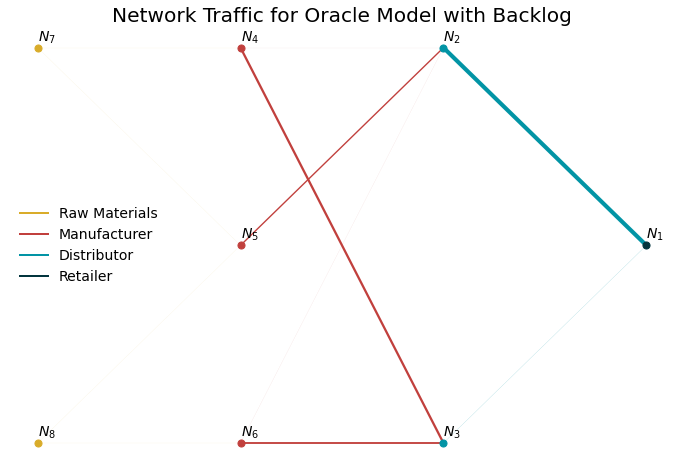

In [342]:
orders = link_useage(or_v2)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
adjacency_matrix = np.vstack(env.graph.edges())
# Set level colors
level_col = {'retailer': 0,
            'distributor': 1,
            'manufacturer': 2,
            'raw_materials': 3}

max_density = np.max([len(v) for v in env.levels.values()])
node_coords = {}
node_num = 8
plt.figure(figsize=(12,8))
for i, (level, nodes) in enumerate(reversed(env.levels.items())):
    n = len(nodes)
    node_y = max_density / 2 if n == 1 else np.linspace(0, max_density, n)
    node_y = np.atleast_1d(node_y)
    plt.scatter(np.repeat(i, n), node_y, label=level, s=50, c=colors[3-i], zorder=1)
    for y in node_y:
        plt.annotate(r'$N_{}$'.format(node_num), xy=(i, y+0.05))
        node_coords[node_num] = (i, y)
        node_num -= 1

# Draw edges and set width by amount of traffic
# lws = []
tot_traffic = np.vstack([v for v in orders.values()]).sum(axis=0).mean()
lws = [v.mean() for v in orders.values()]
lws = softmax(lws, 100) * 10
lws_dict = {k: l for k, l in zip(orders.keys(), lws)}
for node_num, v in reversed(node_coords.items()):
    x, y = v
    sinks = adjacency_matrix[np.where(adjacency_matrix[:, 0]==node_num)][:, 1]
    for s in sinks:
        try:
            sink_coord = node_coords[s]
        except KeyError:
            continue
        for k, n in reversed(env.levels.items()):
            if node_num in n:
                color = colors[level_col[k]]
        x_ = np.hstack([x, sink_coord[0]])
        y_ = np.hstack([y, sink_coord[1]])
        lw = lws_dict[(node_num, s)]
        plt.plot(x_, y_, color=color, linewidth=lw, linestyle='solid', zorder=0)

# plt.ylabel('Node')
plt.yticks([0], [''])
plt.axis('off')
plt.xlabel('Level')
legend_lines = [Line2D([0], [0], color=colors[3]),
                Line2D([0], [0], color=colors[2]),
                Line2D([0], [0], color=colors[1]),
                Line2D([0], [0], color=colors[0])]
plt.legend(legend_lines, ['Raw Materials', 'Manufacturer', 'Distributor', 'Retailer'])
# plt.xticks(np.arange(len(env.levels)), ['Retailer', 'Distributor', 'Manufacturer', 'Raw Materials'])
plt.title('Network Traffic for Oracle Model with Backlog')
plt.grid(False)
plt.show()

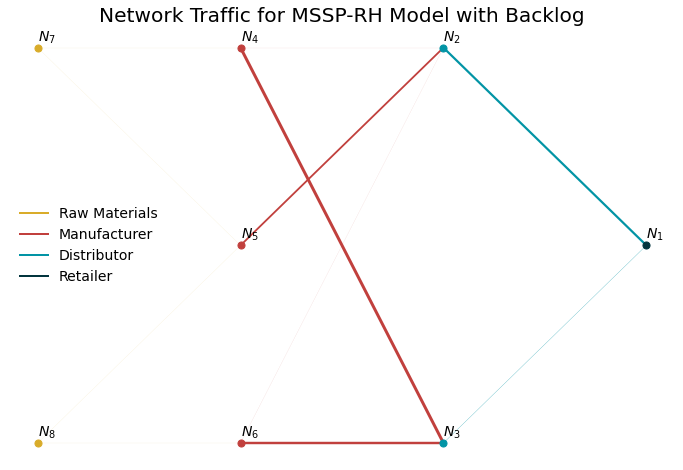

In [343]:
orders = link_useage(sp_rh_v2)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
adjacency_matrix = np.vstack(env.graph.edges())
# Set level colors
level_col = {'retailer': 0,
            'distributor': 1,
            'manufacturer': 2,
            'raw_materials': 3}

max_density = np.max([len(v) for v in env.levels.values()])
node_coords = {}
node_num = 8
plt.figure(figsize=(12,8))
for i, (level, nodes) in enumerate(reversed(env.levels.items())):
    n = len(nodes)
    node_y = max_density / 2 if n == 1 else np.linspace(0, max_density, n)
    node_y = np.atleast_1d(node_y)
    plt.scatter(np.repeat(i, n), node_y, label=level, s=50, c=colors[3-i], zorder=1)
    for y in node_y:
        plt.annotate(r'$N_{}$'.format(node_num), xy=(i, y+0.05))
        node_coords[node_num] = (i, y)
        node_num -= 1

# Draw edges and set width by amount of traffic
# lws = []
tot_traffic = np.vstack([v for v in orders.values()]).sum(axis=0).mean()
lws = [v.mean() for v in orders.values()]
lws = softmax(lws, 100) * 10
lws_dict = {k: l for k, l in zip(orders.keys(), lws)}
for node_num, v in reversed(node_coords.items()):
    x, y = v
    sinks = adjacency_matrix[np.where(adjacency_matrix[:, 0]==node_num)][:, 1]
    for s in sinks:
        try:
            sink_coord = node_coords[s]
        except KeyError:
            continue
        for k, n in reversed(env.levels.items()):
            if node_num in n:
                color = colors[level_col[k]]
        x_ = np.hstack([x, sink_coord[0]])
        y_ = np.hstack([y, sink_coord[1]])
        lw = lws_dict[(node_num, s)]
        plt.plot(x_, y_, color=color, linewidth=lw, linestyle='solid', zorder=0)

# plt.ylabel('Node')
plt.yticks([0], [''])
plt.axis('off')
plt.xlabel('Level')
legend_lines = [Line2D([0], [0], color=colors[3]),
                Line2D([0], [0], color=colors[2]),
                Line2D([0], [0], color=colors[1]),
                Line2D([0], [0], color=colors[0])]
plt.legend(legend_lines, ['Raw Materials', 'Manufacturer', 'Distributor', 'Retailer'])
# plt.xticks(np.arange(len(env.levels)), ['Retailer', 'Distributor', 'Manufacturer', 'Raw Materials'])
plt.title('Network Traffic for MSSP-RH Model with Backlog')
plt.grid(False)
plt.show()

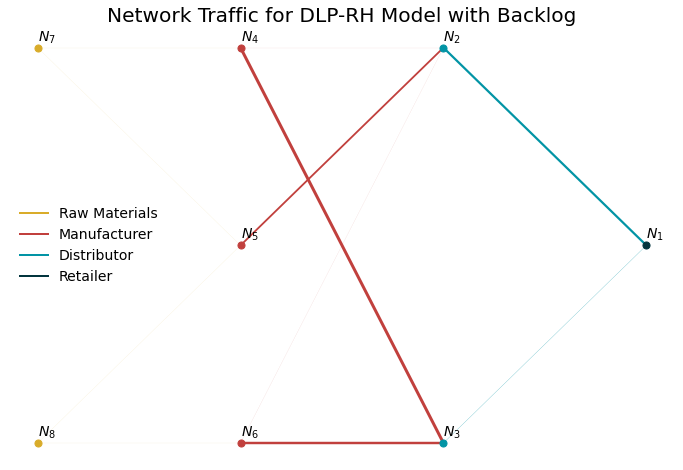

In [344]:
orders = link_useage(rh_v2)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
adjacency_matrix = np.vstack(env.graph.edges())
# Set level colors
level_col = {'retailer': 0,
            'distributor': 1,
            'manufacturer': 2,
            'raw_materials': 3}

max_density = np.max([len(v) for v in env.levels.values()])
node_coords = {}
node_num = 8
plt.figure(figsize=(12,8))
for i, (level, nodes) in enumerate(reversed(env.levels.items())):
    n = len(nodes)
    node_y = max_density / 2 if n == 1 else np.linspace(0, max_density, n)
    node_y = np.atleast_1d(node_y)
    plt.scatter(np.repeat(i, n), node_y, label=level, s=50, c=colors[3-i], zorder=1)
    for y in node_y:
        plt.annotate(r'$N_{}$'.format(node_num), xy=(i, y+0.05))
        node_coords[node_num] = (i, y)
        node_num -= 1

# Draw edges and set width by amount of traffic
# lws = []
tot_traffic = np.vstack([v for v in orders.values()]).sum(axis=0).mean()
lws = [v.mean() for v in orders.values()]
lws = softmax(lws, 100) * 10
lws_dict = {k: l for k, l in zip(orders.keys(), lws)}
for node_num, v in reversed(node_coords.items()):
    x, y = v
    sinks = adjacency_matrix[np.where(adjacency_matrix[:, 0]==node_num)][:, 1]
    for s in sinks:
        try:
            sink_coord = node_coords[s]
        except KeyError:
            continue
        for k, n in reversed(env.levels.items()):
            if node_num in n:
                color = colors[level_col[k]]
        x_ = np.hstack([x, sink_coord[0]])
        y_ = np.hstack([y, sink_coord[1]])
        lw = lws_dict[(node_num, s)]
        plt.plot(x_, y_, color=color, linewidth=lw, linestyle='solid', zorder=0)

# plt.ylabel('Node')
plt.yticks([0], [''])
plt.axis('off')
plt.xlabel('Level')
legend_lines = [Line2D([0], [0], color=colors[3]),
                Line2D([0], [0], color=colors[2]),
                Line2D([0], [0], color=colors[1]),
                Line2D([0], [0], color=colors[0])]
plt.legend(legend_lines, ['Raw Materials', 'Manufacturer', 'Distributor', 'Retailer'])
# plt.xticks(np.arange(len(env.levels)), ['Retailer', 'Distributor', 'Manufacturer', 'Raw Materials'])
plt.title('Network Traffic for DLP-RH Model with Backlog')
plt.grid(False)
plt.show()

# RL-v3 Network Traffic

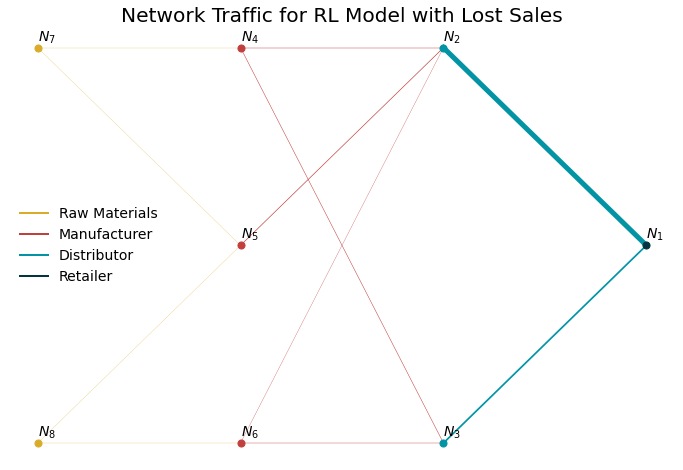

In [345]:
orders = link_useage(rl_v3)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
adjacency_matrix = np.vstack(env.graph.edges())
# Set level colors
level_col = {'retailer': 0,
            'distributor': 1,
            'manufacturer': 2,
            'raw_materials': 3}

max_density = np.max([len(v) for v in env.levels.values()])
node_coords = {}
node_num = 8
plt.figure(figsize=(12,8))
for i, (level, nodes) in enumerate(reversed(env.levels.items())):
    n = len(nodes)
    node_y = max_density / 2 if n == 1 else np.linspace(0, max_density, n)
    node_y = np.atleast_1d(node_y)
    plt.scatter(np.repeat(i, n), node_y, label=level, s=50, c=colors[3-i], zorder=1)
    for y in node_y:
        plt.annotate(r'$N_{}$'.format(node_num), xy=(i, y+0.05))
        node_coords[node_num] = (i, y)
        node_num -= 1

# Draw edges and set width by amount of traffic
# lws = []
tot_traffic = np.vstack([v for v in orders.values()]).sum(axis=0).mean()
lws = [v.mean() for v in orders.values()]
lws = softmax(lws, 100) * 10
lws_dict = {k: l for k, l in zip(orders.keys(), lws)}
for node_num, v in reversed(node_coords.items()):
    x, y = v
    sinks = adjacency_matrix[np.where(adjacency_matrix[:, 0]==node_num)][:, 1]
    for s in sinks:
        try:
            sink_coord = node_coords[s]
        except KeyError:
            continue
        for k, n in reversed(env.levels.items()):
            if node_num in n:
                color = colors[level_col[k]]
        x_ = np.hstack([x, sink_coord[0]])
        y_ = np.hstack([y, sink_coord[1]])
        lw = lws_dict[(node_num, s)]
        plt.plot(x_, y_, color=color, linewidth=lw, linestyle='solid', zorder=0)

# plt.ylabel('Node')
plt.yticks([0], [''])
plt.axis('off')
plt.xlabel('Level')
legend_lines = [Line2D([0], [0], color=colors[3]),
                Line2D([0], [0], color=colors[2]),
                Line2D([0], [0], color=colors[1]),
                Line2D([0], [0], color=colors[0])]
plt.legend(legend_lines, ['Raw Materials', 'Manufacturer', 'Distributor', 'Retailer'])
# plt.xticks(np.arange(len(env.levels)), ['Retailer', 'Distributor', 'Manufacturer', 'Raw Materials'])
plt.title('Network Traffic for RL Model with Lost Sales')
plt.grid(False)
plt.show()

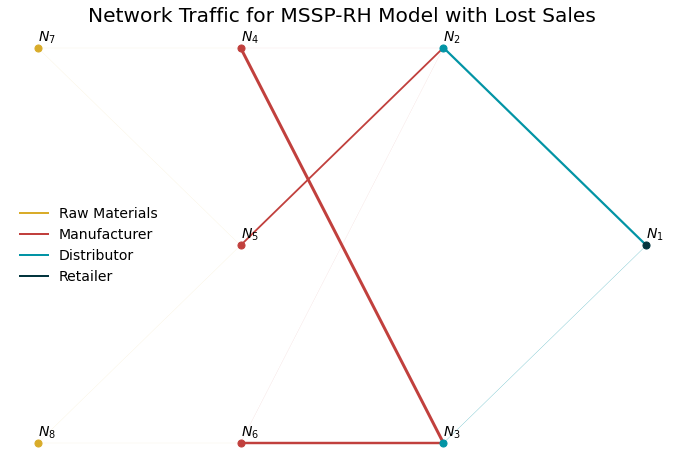

In [346]:
orders = link_useage(sp_rh_v3)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
adjacency_matrix = np.vstack(env.graph.edges())
# Set level colors
level_col = {'retailer': 0,
            'distributor': 1,
            'manufacturer': 2,
            'raw_materials': 3}

max_density = np.max([len(v) for v in env.levels.values()])
node_coords = {}
node_num = 8
plt.figure(figsize=(12,8))
for i, (level, nodes) in enumerate(reversed(env.levels.items())):
    n = len(nodes)
    node_y = max_density / 2 if n == 1 else np.linspace(0, max_density, n)
    node_y = np.atleast_1d(node_y)
    plt.scatter(np.repeat(i, n), node_y, label=level, s=50, c=colors[3-i], zorder=1)
    for y in node_y:
        plt.annotate(r'$N_{}$'.format(node_num), xy=(i, y+0.05))
        node_coords[node_num] = (i, y)
        node_num -= 1

# Draw edges and set width by amount of traffic
# lws = []
tot_traffic = np.vstack([v for v in orders.values()]).sum(axis=0).mean()
lws = [v.mean() for v in orders.values()]
lws = softmax(lws, 100) * 10
lws_dict = {k: l for k, l in zip(orders.keys(), lws)}
for node_num, v in reversed(node_coords.items()):
    x, y = v
    sinks = adjacency_matrix[np.where(adjacency_matrix[:, 0]==node_num)][:, 1]
    for s in sinks:
        try:
            sink_coord = node_coords[s]
        except KeyError:
            continue
        for k, n in reversed(env.levels.items()):
            if node_num in n:
                color = colors[level_col[k]]
        x_ = np.hstack([x, sink_coord[0]])
        y_ = np.hstack([y, sink_coord[1]])
        lw = lws_dict[(node_num, s)]
        plt.plot(x_, y_, color=color, linewidth=lw, linestyle='solid', zorder=0)

# plt.ylabel('Node')
plt.yticks([0], [''])
plt.axis('off')
plt.xlabel('Level')
legend_lines = [Line2D([0], [0], color=colors[3]),
                Line2D([0], [0], color=colors[2]),
                Line2D([0], [0], color=colors[1]),
                Line2D([0], [0], color=colors[0])]
plt.legend(legend_lines, ['Raw Materials', 'Manufacturer', 'Distributor', 'Retailer'])
# plt.xticks(np.arange(len(env.levels)), ['Retailer', 'Distributor', 'Manufacturer', 'Raw Materials'])
plt.title('Network Traffic for MSSP-RH Model with Lost Sales')
# plt.grid(False)
plt.show()

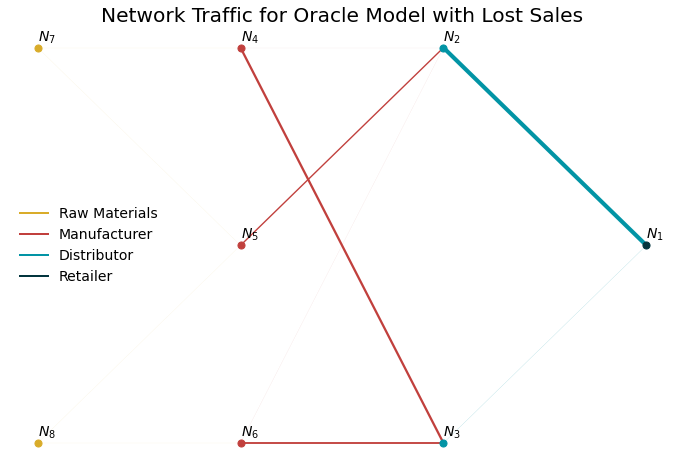

In [347]:
orders = link_useage(or_v3)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
adjacency_matrix = np.vstack(env.graph.edges())
# Set level colors
level_col = {'retailer': 0,
            'distributor': 1,
            'manufacturer': 2,
            'raw_materials': 3}

max_density = np.max([len(v) for v in env.levels.values()])
node_coords = {}
node_num = 8
plt.figure(figsize=(12,8))
for i, (level, nodes) in enumerate(reversed(env.levels.items())):
    n = len(nodes)
    node_y = max_density / 2 if n == 1 else np.linspace(0, max_density, n)
    node_y = np.atleast_1d(node_y)
    plt.scatter(np.repeat(i, n), node_y, label=level, s=50, c=colors[3-i], zorder=1)
    for y in node_y:
        plt.annotate(r'$N_{}$'.format(node_num), xy=(i, y+0.05))
        node_coords[node_num] = (i, y)
        node_num -= 1

# Draw edges and set width by amount of traffic
# lws = []
tot_traffic = np.vstack([v for v in orders.values()]).sum(axis=0).mean()
lws = [v.mean() for v in orders.values()]
lws = softmax(lws, 100) * 10
lws_dict = {k: l for k, l in zip(orders.keys(), lws)}
for node_num, v in reversed(node_coords.items()):
    x, y = v
    sinks = adjacency_matrix[np.where(adjacency_matrix[:, 0]==node_num)][:, 1]
    for s in sinks:
        try:
            sink_coord = node_coords[s]
        except KeyError:
            continue
        for k, n in reversed(env.levels.items()):
            if node_num in n:
                color = colors[level_col[k]]
        x_ = np.hstack([x, sink_coord[0]])
        y_ = np.hstack([y, sink_coord[1]])
        lw = lws_dict[(node_num, s)]
        plt.plot(x_, y_, color=color, linewidth=lw, linestyle='solid', zorder=0)

# plt.ylabel('Node')
plt.yticks([0], [''])
plt.axis('off')
plt.xlabel('Level')
legend_lines = [Line2D([0], [0], color=colors[3]),
                Line2D([0], [0], color=colors[2]),
                Line2D([0], [0], color=colors[1]),
                Line2D([0], [0], color=colors[0])]
plt.legend(legend_lines, ['Raw Materials', 'Manufacturer', 'Distributor', 'Retailer'])
# plt.xticks(np.arange(len(env.levels)), ['Retailer', 'Distributor', 'Manufacturer', 'Raw Materials'])
plt.title('Network Traffic for Oracle Model with Lost Sales')
# plt.grid(False)
plt.show()

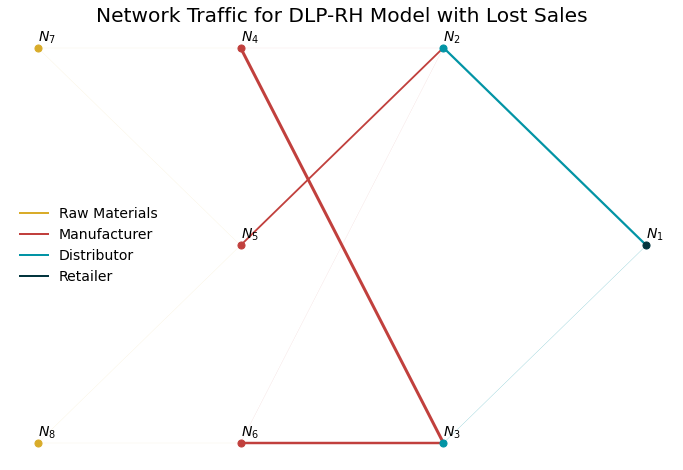

In [348]:
orders = link_useage(rh_v3)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
adjacency_matrix = np.vstack(env.graph.edges())
# Set level colors
level_col = {'retailer': 0,
            'distributor': 1,
            'manufacturer': 2,
            'raw_materials': 3}

max_density = np.max([len(v) for v in env.levels.values()])
node_coords = {}
node_num = 8
plt.figure(figsize=(12,8))
for i, (level, nodes) in enumerate(reversed(env.levels.items())):
    n = len(nodes)
    node_y = max_density / 2 if n == 1 else np.linspace(0, max_density, n)
    node_y = np.atleast_1d(node_y)
    plt.scatter(np.repeat(i, n), node_y, label=level, s=50, c=colors[3-i], zorder=1)
    for y in node_y:
        plt.annotate(r'$N_{}$'.format(node_num), xy=(i, y+0.05))
        node_coords[node_num] = (i, y)
        node_num -= 1

# Draw edges and set width by amount of traffic
# lws = []
tot_traffic = np.vstack([v for v in orders.values()]).sum(axis=0).mean()
lws = [v.mean() for v in orders.values()]
lws = softmax(lws, 100) * 10
lws_dict = {k: l for k, l in zip(orders.keys(), lws)}
for node_num, v in reversed(node_coords.items()):
    x, y = v
    sinks = adjacency_matrix[np.where(adjacency_matrix[:, 0]==node_num)][:, 1]
    for s in sinks:
        try:
            sink_coord = node_coords[s]
        except KeyError:
            continue
        for k, n in reversed(env.levels.items()):
            if node_num in n:
                color = colors[level_col[k]]
        x_ = np.hstack([x, sink_coord[0]])
        y_ = np.hstack([y, sink_coord[1]])
        lw = lws_dict[(node_num, s)]
        plt.plot(x_, y_, color=color, linewidth=lw, linestyle='solid', zorder=0)

# plt.ylabel('Node')
plt.yticks([0], [''])
plt.axis('off')
plt.xlabel('Level')
legend_lines = [Line2D([0], [0], color=colors[3]),
                Line2D([0], [0], color=colors[2]),
                Line2D([0], [0], color=colors[1]),
                Line2D([0], [0], color=colors[0])]
plt.legend(legend_lines, ['Raw Materials', 'Manufacturer', 'Distributor', 'Retailer'])
# plt.xticks(np.arange(len(env.levels)), ['Retailer', 'Distributor', 'Manufacturer', 'Raw Materials'])
plt.title('Network Traffic for DLP-RH Model with Lost Sales')
# plt.grid(False)
plt.show()

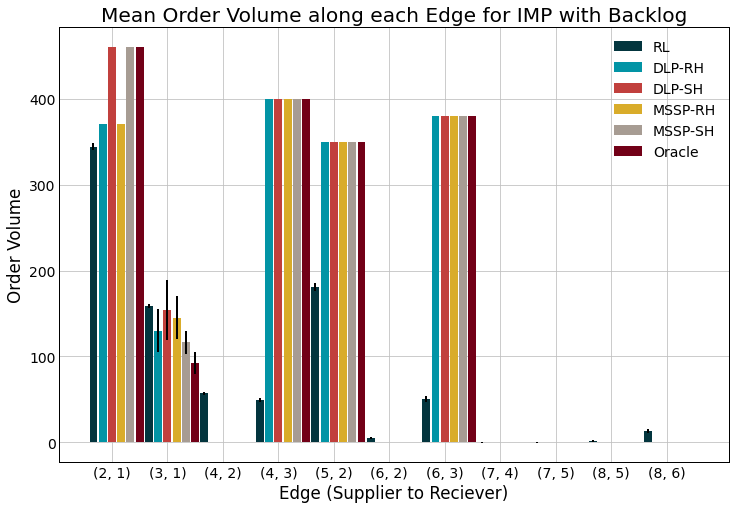

In [268]:
order_data = {'RL': rl_v2,
              'DLP-RH': rh_v2,
              'DLP-SH': sh_v2,
              'MSSP-RH': sp_rh_v2,
              'MSSP-SH': sp_sh_v2,
              'Oracle': or_v2}

plt.figure(figsize=(12, 8))

for i, (k, v) in enumerate(order_data.items()):
    orders = link_useage(v)
    
    mean_orders = [v.mean() for v in orders.values()]
    std_orders = [v.std() for v in orders.values()]
    plt.bar(np.arange(len(mean_orders)) + i/len(order_data) - 1/3, mean_orders, 
            width=1/7, yerr=std_orders, label=k)
    
plt.legend()
plt.xticks(np.arange(len(mean_orders)), [k for k in orders.keys()])
plt.xlabel('Edge (Supplier to Reciever)')
plt.ylabel('Order Volume')
plt.title('Mean Order Volume along each Edge for IMP with Backlog')
plt.show()

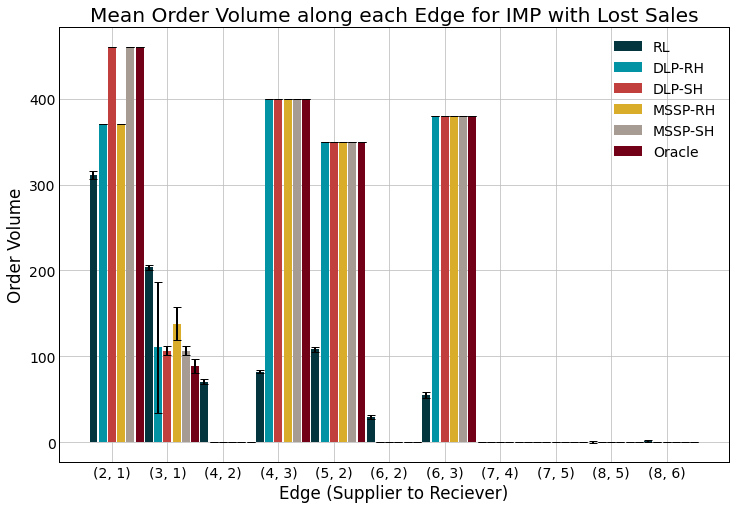

In [289]:
order_data = {'RL': rl_v3,
              'DLP-RH': rh_v3,
              'DLP-SH': sh_v3,
              'MSSP-RH': sp_rh_v3,
              'MSSP-SH': sp_sh_v3,
              'Oracle': or_v3}

plt.figure(figsize=(12, 8))

for i, (k, v) in enumerate(order_data.items()):
    orders = link_useage(v)
    
    mean_orders = [v.mean() for v in orders.values()]
    std_orders = [v.std() for v in orders.values()]
    plt.bar(np.arange(len(mean_orders)) + i/len(order_data) - 1/3, mean_orders, 
            width=1/7, yerr=std_orders, label=k, capsize=4)
    
plt.legend()
plt.xticks(np.arange(len(mean_orders)), [k for k in orders.keys()])
plt.xlabel('Edge (Supplier to Reciever)')
plt.ylabel('Order Volume')
plt.title('Mean Order Volume along each Edge for IMP with Lost Sales')
plt.show()

# Lost Sales

In [283]:
def get_lost_sales(models):
    lost_sales = np.zeros(len(models))
    for i, (k, v) in enumerate(models.items()):
        lost_sales[i] += v.U.sum()
        
    return lost_sales

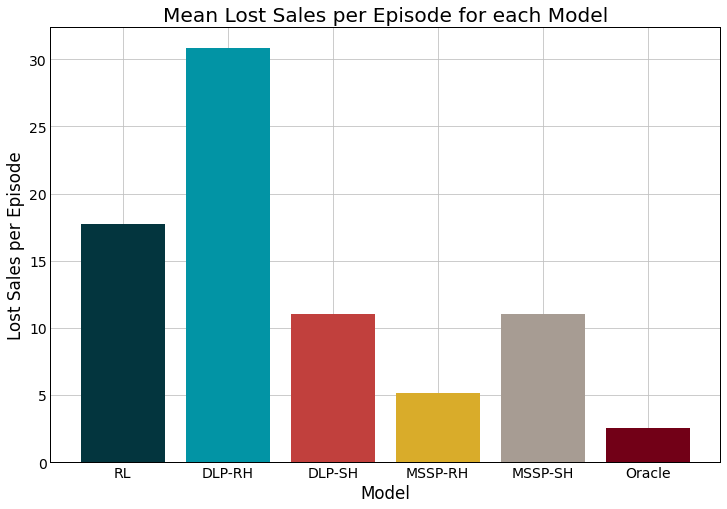

In [295]:
order_data = {'RL': rl_v3,
              'DLP-RH': rh_v3,
              'DLP-SH': sh_v3,
              'MSSP-RH': sp_rh_v3,
              'MSSP-SH': sp_sh_v3,
              'Oracle': or_v3}

ls_mean = np.array([get_lost_sales(v).mean() for v in order_data.values()])
ls_std = np.array([get_lost_sales(v).std() for v in order_data.values()])

plt.figure(figsize=(12,8))
plt.bar(np.arange(len(ls_mean)), ls_mean, color=colors)

plt.xticks(np.arange(len(ls_mean)), [k for k in order_data.keys()])
plt.xlabel('Model')
plt.ylabel('Lost Sales per Episode')
plt.title('Mean Lost Sales per Episode for each Model')
plt.show()

In [292]:
rl_ls.std()

16.125520146649535

In [293]:
rl_ls.mean()

17.74